# Chapter: Control Charts for Statistical Process Control


# Topic: CUSUM Control Chart

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
np.random.seed(10)

In [2]:
# generate data
# NOC data
N = 250
x0 = np.random.normal(loc=10, scale=2, size=N)

# faulty data
N = 50
x1 = np.random.normal(loc=11, scale=2, size=N)

# combine data
x = np.hstack((x0,x1))

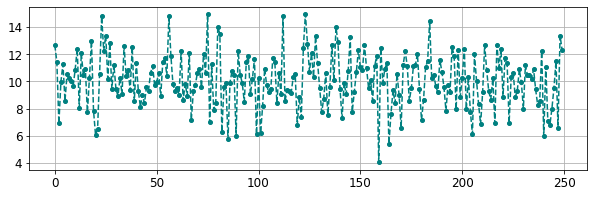

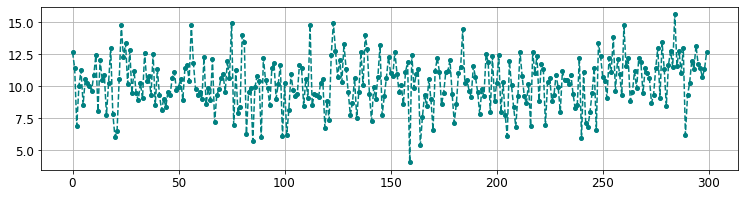

In [3]:
# plots
plt.figure(figsize=(10,3))
plt.plot(x0,'--',marker='o', markersize=4, color='teal')
plt.grid()

plt.figure(figsize=(12.5,3))
plt.plot(x,'--',marker='o', markersize=4, color='teal')
plt.grid()
plt.show()

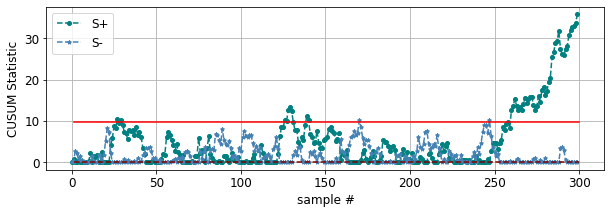

In [4]:
# CUSUM chart
mu, sigma = np.mean(x0), np.std(x0)
k = 0.25*sigma
H = 5*sigma

S_positive = np.zeros((len(x),))
S_negative = np.zeros((len(x),))

S_positive[0] = 0
S_negative[0] = 0

for i in range(1,len(x)):
    S_positive[i] = np.max([0, x[i]-(mu+k) + S_positive[i-1]])
    S_negative[i] = np.max([0, (mu-k)-x[i] + S_negative[i-1]])

plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([1,len(x)],[H,H], color='red')
plt.plot([1,len(x)],[0,0], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('CUSUM Statistic')
plt.grid()
plt.legend()
plt.show()